In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
import datetime as dt
from matplotlib import pyplot as plt

In [2]:
train = pd.read_csv("train.csv")
train

,datetime,total
0,01.01.2005 00:00:00,?
1,01.01.2005 01:00:00,154140
2,01.01.2005 02:00:00,157818
3,01.01.2005 03:00:00,149311
4,01.01.2005 04:00:00,138282
...,...,...
35059,31.12.2008 19:00:00,249376
35060,31.12.2008 20:00:00,246511
35061,31.12.2008 21:00:00,226469
35062,31.12.2008 22:00:00,199907


In [3]:
#time_format = "%d.%m.%Y %H:%M:%S"
#train["datetime"] = [dt.datetime.strptime(s, time_format) for s in train["datetime"]]
train["datetime"] = pd.to_datetime(train["datetime"], format='%d.%m.%Y %H:%M:%S')

In [4]:
train['month'] = pd.DatetimeIndex(train["datetime"]).month.astype(int)
train["weekDay"] = pd.DatetimeIndex(train["datetime"]).weekday.astype(int)
train["day"] = pd.DatetimeIndex(train["datetime"]).day.astype(int)

train["hour"] = [date.hour for date in train["datetime"]]
train["hour"].astype(int)
train['total'] = train['total']

In [5]:
train.head(50)

,datetime,total,month,weekDay,day,hour
0,2005-01-01 00:00:00,?,1,5,1,0
1,2005-01-01 01:00:00,154140,1,5,1,1
2,2005-01-01 02:00:00,157818,1,5,1,2
3,2005-01-01 03:00:00,149311,1,5,1,3
4,2005-01-01 04:00:00,138282,1,5,1,4
5,2005-01-01 05:00:00,132033,1,5,1,5
6,2005-01-01 06:00:00,129193,1,5,1,6
7,2005-01-01 07:00:00,131026,1,5,1,7
8,2005-01-01 08:00:00,138040,1,5,1,8
9,2005-01-01 09:00:00,158872,1,5,1,9


In [6]:
#train.iloc(np.where(train["total"] == '?'))

In [7]:
# replace unknown and negative or zero consumtion with mean of such days of year (1 january, for examle)

# for i in np.where(train['total']=='?')[0]:
#     t = np.mean(list(map(float, train.loc[\
#                 (train['day'] == train['day'][i]) \
#                & (train['month'] == train['month'][i])\
#                & (train['hour'] == train['hour'][i])\
#                & (train['total']!='?')]['total'])))
    
#     train['total'][i] = t
#     print(train['total'][i])
#     #train['total'][i] = np.mean()
    
# train['total'] = train['total'].astype(float)

# for i in np.where(train['total']<=0)[0]:
#     t = np.mean(list(map(float, train.loc[\
#                 (train['day'] == train['day'][i]) \
#                & (train['month'] == train['month'][i])\
#                & (train['hour'] == train['hour'][i])\
#                & (train['total']>=0)]['total'])))
    
#     train['total'][i] = t
#     print(train['total'][i])

In [8]:
train.replace(to_replace='?', value=0, inplace=True)
train['total'] = train['total'].astype(float)
train.replace(to_replace=0.0, value=np.nan, inplace=True)

train.interpolate(inplace=True)
train.total[0]=train.total[1]
train['total'][train['total'] <80000] = np.nan
train.interpolate(inplace=True)

<ipython-input-8-836f0fa94b62>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.total[0]=train.total[1]
<ipython-input-8-836f0fa94b62>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['total'][train['total'] <80000] = np.nan


In [9]:
train

,datetime,total,month,weekDay,day,hour
0,2005-01-01 00:00:00,154140.0,1,5,1,0
1,2005-01-01 01:00:00,154140.0,1,5,1,1
2,2005-01-01 02:00:00,157818.0,1,5,1,2
3,2005-01-01 03:00:00,149311.0,1,5,1,3
4,2005-01-01 04:00:00,138282.0,1,5,1,4
...,...,...,...,...,...,...
35059,2008-12-31 19:00:00,249376.0,12,2,31,19
35060,2008-12-31 20:00:00,246511.0,12,2,31,20
35061,2008-12-31 21:00:00,226469.0,12,2,31,21
35062,2008-12-31 22:00:00,199907.0,12,2,31,22


In [10]:
train.groupby(by=["weekDay"], dropna=False).mean()

,total,month,day,hour
weekDay,,,,
0,186205.998505,6.502392,15.851675,11.5
1,184965.217604,6.483254,15.688995,11.5
2,185498.889653,6.511962,15.818182,11.5
3,185597.109776,6.519231,15.725962,11.5
4,184198.719952,6.552885,15.692308,11.5
5,183070.223485,6.559809,15.602871,11.5
6,186409.549242,6.531100,15.727273,11.5


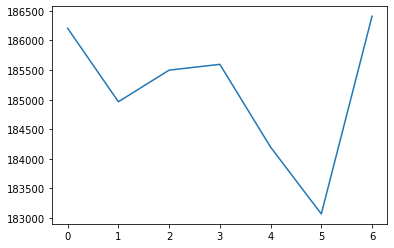

In [11]:
plt.plot(train.groupby(by=["weekDay"], dropna=False).mean()['total'])

In [12]:
x= sorted(train['weekDay'].unique())


In [13]:
train.corr()

,total,month,weekDay,day,hour
total,1.000000,-0.031972,-7.034156e-03,6.617361e-03,6.750748e-01
month,-0.031972,1.000000,5.804036e-03,1.052232e-02,0.000000e+00
weekDay,-0.007034,0.005804,1.000000e+00,-5.451783e-03,-1.097127e-20
day,0.006617,0.010522,-5.451783e-03,1.000000e+00,-5.202774e-18
hour,0.675075,0.000000,-1.097127e-20,-5.202774e-18,1.000000e+00


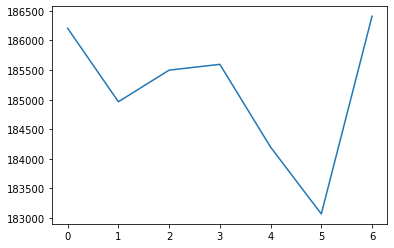

In [14]:
plt.plot(train.groupby(by=["weekDay"]).mean()['total'])

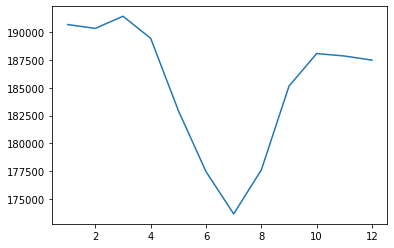

In [15]:
plt.plot(train.groupby(by=["month"]).mean()['total'])

[]

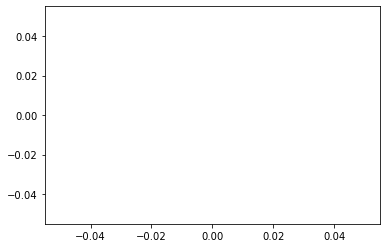

In [16]:
plt.plot()

In [17]:
train

,datetime,total,month,weekDay,day,hour
0,2005-01-01 00:00:00,154140.0,1,5,1,0
1,2005-01-01 01:00:00,154140.0,1,5,1,1
2,2005-01-01 02:00:00,157818.0,1,5,1,2
3,2005-01-01 03:00:00,149311.0,1,5,1,3
4,2005-01-01 04:00:00,138282.0,1,5,1,4
...,...,...,...,...,...,...
35059,2008-12-31 19:00:00,249376.0,12,2,31,19
35060,2008-12-31 20:00:00,246511.0,12,2,31,20
35061,2008-12-31 21:00:00,226469.0,12,2,31,21
35062,2008-12-31 22:00:00,199907.0,12,2,31,22


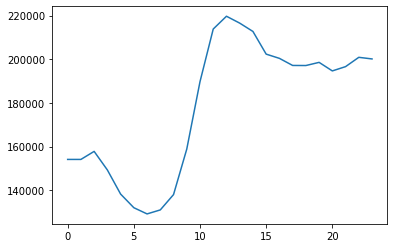

In [18]:
plt.plot(train['total'][:24])

In [19]:
from sklearn.metrics import mean_absolute_error

In [20]:
ar = AutoReg(train['total'], lags=[12,168, 8760], trend = 'ct').fit()

C:\Users\gleb\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [21]:
answer = ar.predict(start=35064, end=35064+4344-1, dynamic=False)

In [22]:
answer = list(map(int, answer))

In [23]:
#mean_absolute_error(test['total'], answer)

In [24]:
answer

[154202,
 121838,
 103880,
 96090,
 92715,
 105983,
 143302,
 181846,
 179837,
 187139,
 192349,
 192574,
 191877,
 186825,
 181206,
 175258,
 175946,
 174986,
 178975,
 189109,
 198261,
 206239,
 207819,
 194120,
 157708,
 122965,
 103258,
 95511,
 92779,
 106662,
 141217,
 176912,
 183294,
 193978,
 196737,
 198487,
 194139,
 189476,
 183553,
 178948,
 177035,
 176547,
 182886,
 187648,
 195568,
 200098,
 199761,
 186184,
 153449,
 127370,
 107621,
 97805,
 93571,
 97347,
 110488,
 130834,
 157663,
 193122,
 215551,
 222157,
 216825,
 209679,
 201035,
 193101,
 191231,
 190209,
 188983,
 190023,
 192814,
 200915,
 197206,
 181305,
 154480,
 129076,
 110067,
 97798,
 93472,
 96051,
 105073,
 121338,
 144270,
 184352,
 212848,
 219418,
 216693,
 210342,
 203273,
 195677,
 195631,
 194172,
 199800,
 206934,
 212011,
 222307,
 213764,
 194720,
 161011,
 125415,
 105993,
 96490,
 94892,
 108381,
 142423,
 171621,
 181337,
 194815,
 202007,
 202219,
 197562,
 192273,
 187144,
 180341,
 180

In [26]:
with open("answer.txt", "w") as f:
    for v in answer:
        f.write(str(v))
        f.write('\n')